___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 8: Unsupervised learning

## Lab work 8



#### Мета: 

* навчитися використовувати моделі без учителем

### Завдання 1:

Опрацюйте файл `Groceries.csv`. Використовуючи алгоритм асоціативних зв'язків, знайдіть:
- зробіть описову статистику даного файлу
- ведіть топ-3 продукти, що продаються
- виведіть топ-2 пари продуктів, що продаються
- придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from apyori import apriori

groceries = pd.read_csv("groceries.csv")
groceries

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
groceries.shape

(9835, 33)

In [19]:
groceries = groceries.drop(['Item(s)'], axis=1)
groceries

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
groceries.describe()

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
count,9835,7676,6033,4734,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,153,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,shopping bags,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


In [20]:
#first we extract all records from dataset
records = []

for i in range(0, 9835):
    records.append([str(groceries.values[i,j]) for j in range(0, 32) ])

In [1]:
# records

In [21]:
#after we drop nan from the records
records = [[val for val in record if val != 'nan'] for record in records]
# records

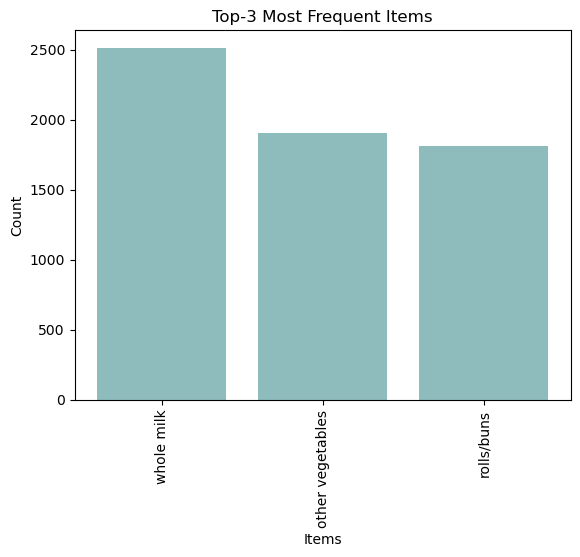

In [22]:
#Now we get top-3 products
from collections import Counter

# Flatten the nested lists within 'records'
flatten_records = [item for sublist in records for item in sublist]

# Count the occurrences of each item
item_counts = Counter(flatten_records)

# Extract the top 10 most frequent items and their counts
top_items = item_counts.most_common(3)
items, counts = zip(*top_items)

# Create a bar plot to visualize the top 10 counts
plt.bar(items, counts, color='cadetblue', alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('Items')
plt.ylabel('Count')
plt.title('Top-3 Most Frequent Items')
plt.show()


<b> Taking into account these results, we can advise managers of the store to increase the assortment of dairy products,
vegetables and rolls/buns. Also dairy department and bread/rolls departments should be situated close to each other
    to increase the sales.

<b> Apriori model number 1

In [33]:
#Apriori model with the first set of sufficiently high metrics
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3)

In [34]:
association_rules

<generator object apriori at 0x000001FAF686F4A0>

In [35]:
association_results = list(association_rules)

In [36]:
print(len(association_results))

64


In [39]:
#We get the list of items pairs with various Support and Confidence and Lift not lower than 3
#I will not print them out because the list is too long for showing on GitHub
for item in association_rules:
    pair = item[0] 
    items = [x for x in pair]
#     print("Rule: " + items[0] + " -> " + items[1] )

#     print("Support: " + str(item[1]))

#     print("Confidence: " + str(item[2][0][2]))
#     print("Lift: " + str(item[2][0][3]))
#     print("=====================================")

In [14]:
#Support: how popular an itemset is, how frequent an itemset is in all the transactions.
#Fraction of transactions containing the itemset

#Confidence: how likely item Y is purchased when item X is purchased, expressed as {X -> Y}.
#Probability of occurrence of {Y} given {X} is present

#Lift: how many times more often X and Y occur together than expected if they where statistically independent
#Ratio of confidence to baseline probability of occurrence of {Y}

In [29]:
#Now we need to find top-2 products pairs with the highest metrics

# Convert the generator to a list
association_rules_list = list(association_rules)

# Sort the rules by support in descending order
sorted_rules_support = sorted(association_rules_list, key=lambda x: x[1], reverse=True)

# Select the top 2 rules with the highest support
top_support_rules = sorted_rules_support[:2]

# Sort the rules by confidence in descending order
sorted_rules_confidence = sorted(association_rules_list, key=lambda x: x[2][0][2], reverse=True)

# Select the top 2 rules with the highest confidence
top_confidence_rules = sorted_rules_confidence[:2]

# Sort the rules by lift in descending order
sorted_rules_lift = sorted(association_rules_list, key=lambda x: x[2][0][3], reverse=True)

# Select the top 2 rules with the highest lift
top_lift_rules = sorted_rules_lift[:2]

# Print the top 2 rules with the highest support
print("Top 2 rules with the highest support:")
for rule in top_support_rules:
    items = list(rule[0])
    print("Rule: " + str(items[0]) + " -> " + str(items[1]))
    print("Support: " + str(rule[1]))
    print("Confidence: " + str(rule[2][0][2]))
    print("Lift: " + str(rule[2][0][3]))
    print("=====================================")

# Print the top 2 rules with the highest confidence
print("Top 2 rules with the highest confidence:")
for rule in top_confidence_rules:
    items = list(rule[0])
    print("Rule: " + str(items[0]) + " -> " + str(items[1]))
    print("Support: " + str(rule[1]))
    print("Confidence: " + str(rule[2][0][2]))
    print("Lift: " + str(rule[2][0][3]))
    print("=====================================")

# Print the top 2 rules with the highest lift
print("Top 2 rules with the highest lift:")
for rule in top_lift_rules:
    items = list(rule[0])
    print("Rule: " + str(items[0]) + " -> " + str(items[1]))
    print("Support: " + str(rule[1]))
    print("Confidence: " + str(rule[2][0][2]))
    print("Lift: " + str(rule[2][0][3]))
    print("=====================================")

Top 2 rules with the highest support:
Rule: beef -> root vegetables
Support: 0.017386883579054397
Confidence: 0.3313953488372093
Lift: 3.0403668431100312
Rule: other vegetables -> tropical fruit
Support: 0.012302999491611592
Confidence: 0.34277620396600567
Lift: 3.144779819035136
Top 2 rules with the highest confidence:
Rule: other vegetables -> whipped/sour cream
Support: 0.005592272496187087
Confidence: 0.6043956043956045
Lift: 3.1236104935526905
Rule: yogurt -> other vegetables
Support: 0.004880528723945094
Confidence: 0.5853658536585367
Lift: 3.0252617817822953
Top 2 rules with the highest lift:
Rule: flour -> sugar
Support: 0.00498220640569395
Confidence: 0.28654970760233917
Lift: 8.46311223504206
Rule: yogurt -> other vegetables
Support: 0.00498220640569395
Confidence: 0.23671497584541062
Lift: 5.452205591193474


<b> Apriori model number 2

In [30]:
#Now we can adjust the next Apriori model to search only for the products pairs around the highest metrics
association_rules_highest = apriori(records, min_support=0.010, min_confidence=0.4, min_lift=3)
association_rules_highest

<generator object apriori at 0x000002952E913CF0>

In [31]:
#We get the list of items pairs with maximum metrics to ensure that 
for item in association_rules_highest:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1] )

    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: other vegetables -> citrus fruit
Support: 0.010371123538383325
Confidence: 0.5862068965517241
Lift: 3.0296084222733612
Rule: other vegetables -> tropical fruit
Support: 0.012302999491611592
Confidence: 0.5845410628019324
Lift: 3.020999134344196


<b> We can see from these rules that they are equal to each other. All these are fruits and vegetables.
From one side it says to us that our investigations are right. And we can give our advice to the store: to increase the
assortiment of vegetables and fruits because ussually they are bought in pairs.

<b> But from the other side we can see that our chosen metrics are very high. To get information about the nest pairs of
bought products we should create another model with lower metrics to ensure that products other than fruits and
vegetables will be caught in the top list

<b> Apriori model number 3

In [32]:
#The next Apriori model with 'middle' metrics (just after the high metrics)
association_rules_middle = apriori(records, min_support=0.010, min_confidence=0.3, min_lift=3)
association_rules_middle


<generator object apriori at 0x000002952E913900>

In [33]:
#We get the list of items pairs with maximum metrics to ensure that 
for item in association_rules_middle:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1] )

    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: beef -> root vegetables
Support: 0.017386883579054397
Confidence: 0.3313953488372093
Lift: 3.0403668431100312
Rule: other vegetables -> citrus fruit
Support: 0.010371123538383325
Confidence: 0.3591549295774648
Lift: 3.295045459323103
Rule: other vegetables -> tropical fruit
Support: 0.012302999491611592
Confidence: 0.34277620396600567
Lift: 3.144779819035136


<b> Lowering the metrics, it was possible to find another pair with high support/confidence/lift. 
    This was 'root vegetables - beef'. By the way, it was the pair of  products with the highest support - the most popular
    among all other pairs.
    Again, this was about vegetables but in this case - together with beef meat.
    <p> Taking into account this pair, we can advice to store managers to increase the assortment of meat and vegetables
    to maximize the support of various modifications of this pair. 

### Завдання 2:

Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
 
- Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції
- Опишіть отримані результати

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [35]:
#descriptive statistics
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [36]:
#types of data
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [37]:
#searching nulls
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

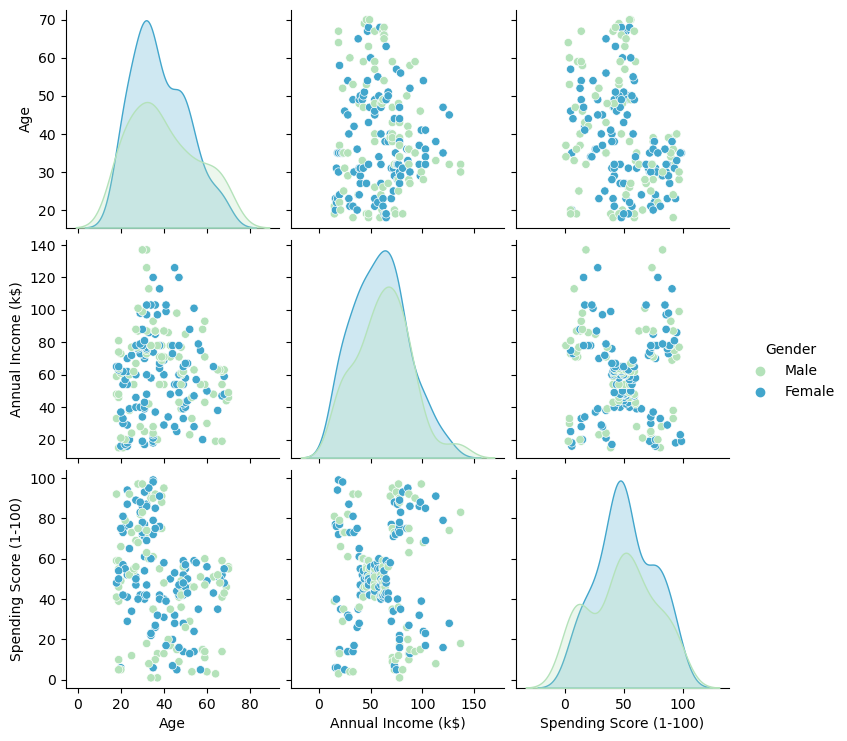

In [38]:
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', palette="GnBu")
plt.show()

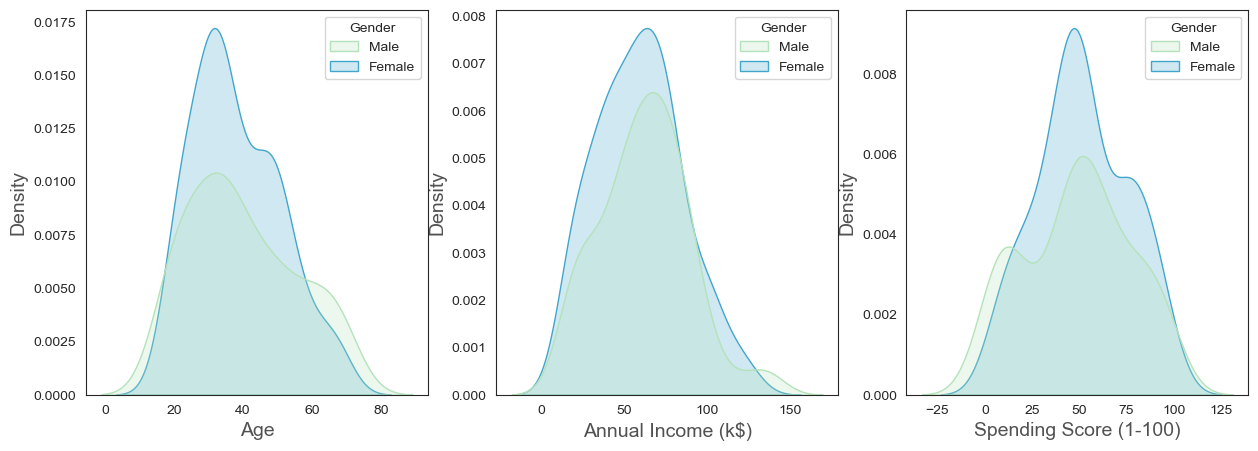

In [39]:
#Visualization

sns.set_style("white")
fg, ax = plt.subplots(1, 3, figsize=(15, 5))

fg1 = sns.kdeplot(data=df, x="Age", hue="Gender", palette="GnBu", ax=ax[0], fill=True)
ax[0].set_xlabel("Age", fontsize=14, alpha=0.8)
ax[0].set_ylabel("Density", fontsize=14, alpha=0.8)

fg2 = sns.kdeplot(data=df, x="Annual Income (k$)", hue="Gender", palette="GnBu", ax=ax[1], fill=True)
ax[1].set_xlabel("Annual Income (k$)", fontsize=14, alpha=0.8)
ax[1].set_ylabel("Density", fontsize=14, alpha=0.8)

fg3 = sns.kdeplot(data=df, x="Spending Score (1-100)", hue="Gender", palette="GnBu", ax=ax[2], fill=True)
ax[2].set_xlabel("Spending Score (1-100)", fontsize=14, alpha=0.8)
ax[2].set_ylabel("Density", fontsize=14, alpha=0.8)

plt.show()

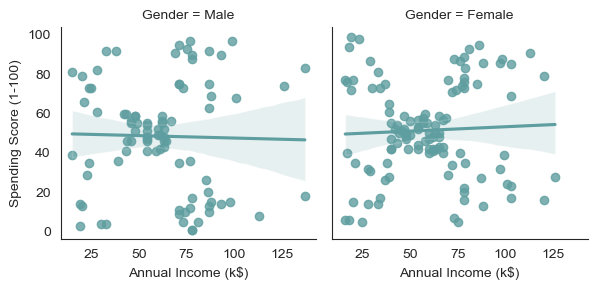

In [40]:
g = sns.FacetGrid(df, col="Gender")
g.map_dataframe(sns.regplot, x="Annual Income (k$)", y="Spending Score (1-100)", color='cadetblue')
g.add_legend();

<b> From all these visualizations it can be seen that female in general buy more products, but there are no obvious
tendencies between sex and other features. 
    <p> There are tendencies between age and income, and consequently - between age and spending score. Spending Score seem to be the most reliable feature, since it does not have outliers and has clear correlation with age.
    

<b> KMeans Model

In [28]:
#Creating KMean Model

In [160]:
#I need to encode Male/Female
encoded_df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Display the encoded DataFrame
print(encoded_df)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Cluster  \
0             1   19                  15                      39        0   
1             2   21                  15                      81        0   
2             3   20                  16                       6        5   
3             4   23                  16                      77        0   
4             5   31                  17                      40        5   
..          ...  ...                 ...                     ...      ...   
195         196   35                 120                      79        4   
196         197   45                 126                      28        2   
197         198   32                 126                      74        4   
198         199   32                 137                      18        2   
199         200   30                 137                      83        4   

     Gender_Male  
0              1  
1              1  
2              0  

In [ ]:
#Gender_Male: Male - 1, Female - 0

In [213]:
# select needed columns for analysis (I choosed all the columns)
X = encoded_df[['Age', 'Spending Score (1-100)']]

# for K-means analysis we must standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\liman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\liman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\liman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\liman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

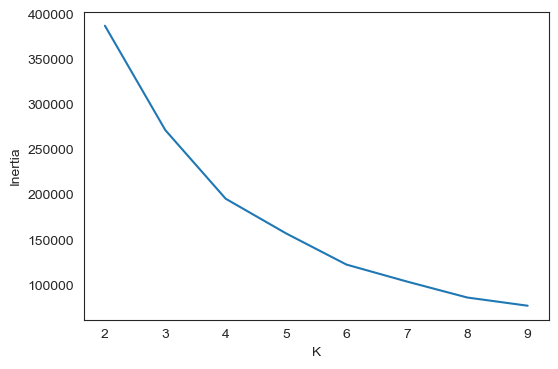

In [214]:
#Choose the possible number of clusters

inertias = []
sizes = range(2, 10)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(encoded_df)
    inertias.append(k2.inertia_)

fig, ax= plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia");

<b> KMeans Model with 3 clusters 

In [215]:
#From inertia plot we can see 4 thresholds - at 3, 4, 5 and 6 

# fit the model with 3 clusters 
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

C:\Users\liman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\liman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [216]:
encoded_df["Cluster"] = kmeans.labels_
print(encoded_df["Cluster"].unique())

[0 2 1]


In [166]:
encoded_df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,0,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,0,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,2,1


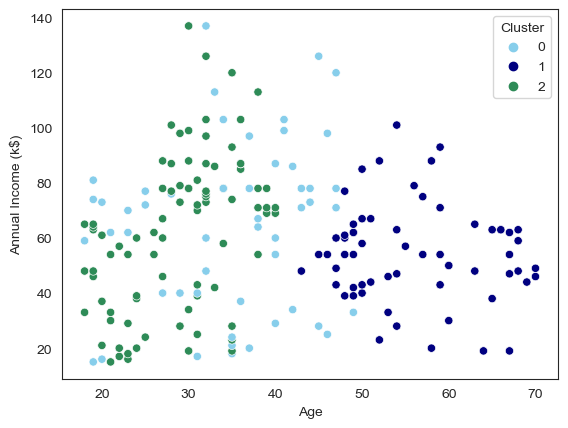

In [217]:
#Age and Annual Income
s=sns.scatterplot(data=encoded_df, x="Age", y="Annual Income (k$)", hue="Cluster", palette=["skyblue", "navy", "seagreen"])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend(title="Cluster", loc="best")
plt.show()

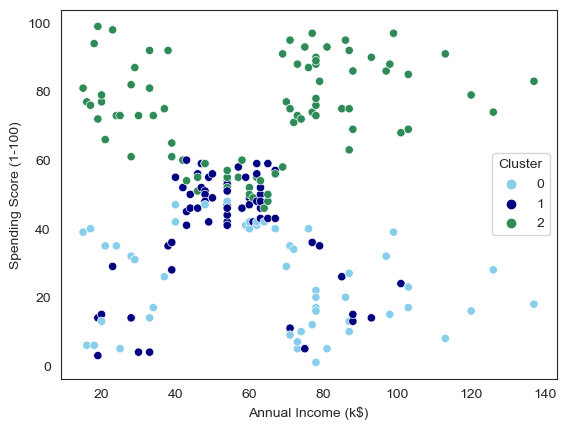

In [218]:
#Age and Spending Score (1-100)
s1=sns.scatterplot(data=encoded_df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette=["skyblue", "navy", "seagreen"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster", loc="best")
plt.show()

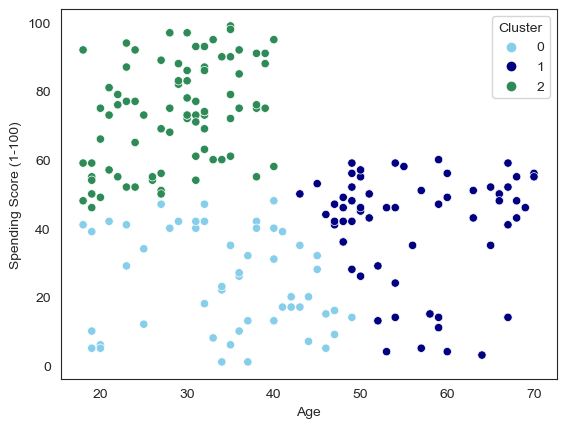

In [219]:
#Age and Spending Score (1-100)
s3=sns.scatterplot(data=encoded_df, x="Age", y="Spending Score (1-100)", hue="Cluster", palette=["skyblue", "navy", "seagreen"])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster", loc="best")
plt.show()

In [220]:
#Calculate silhouette_score for this model
from sklearn.metrics import silhouette_score

label=kmeans.predict(X_scaled)
print(f'Silhouette Score(n=3): {silhouette_score(X_scaled, label)}')

Silhouette Score(n=3): 0.43952990002101927


<b> KMeans Model with 4 clusters 

In [221]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

C:\Users\liman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\liman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [222]:
encoded_df["Cluster"] = kmeans.labels_
print(encoded_df["Cluster"].unique())

[0 2 3 1]


C:\Users\liman\AppData\Local\Temp\ipykernel_14072\511434156.py:2: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  s4=sns.scatterplot(data=encoded_df, x="Age", y="Annual Income (k$)", hue="Cluster", palette=["skyblue", "seagreen",


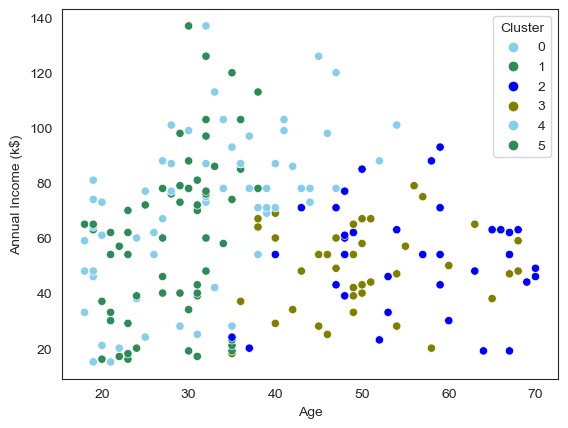

In [198]:
#Age and Annual Income
s4=sns.scatterplot(data=encoded_df, x="Age", y="Annual Income (k$)", hue="Cluster", palette=["skyblue", "seagreen", 
                                                                                  "blue", "olive"])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend(title="Cluster", loc="best")
plt.show()

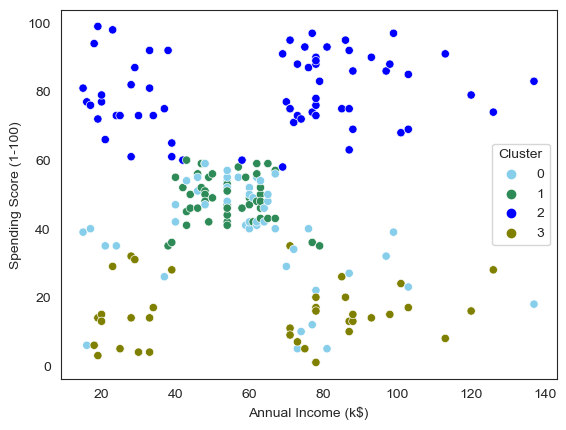

In [223]:
#Annual income and Spending Score (1-100)
s5=sns.scatterplot(data=encoded_df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette=["skyblue", "seagreen", 
                                                                                  "blue", "olive"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster", loc="best")
plt.show()

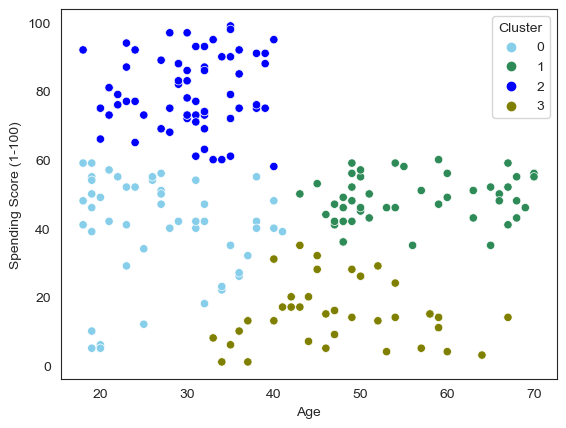

In [224]:
#Age and Spending Score (1-100)
s6=sns.scatterplot(data=encoded_df, x="Age", y="Spending Score (1-100)", hue="Cluster", 
                palette=["skyblue", "seagreen", 
                        "blue", "olive"])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster", loc="best")
plt.show()

In [225]:
#Calculate silhouette_score for this model

label=kmeans.predict(X_scaled)
print(f'Silhouette Score(n=4): {silhouette_score(X_scaled, label)}')

Silhouette Score(n=4): 0.4383860846531993


<b> KMeans Model with 5 clusters 

In [226]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

C:\Users\liman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\liman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [227]:
encoded_df["Cluster"] = kmeans.labels_
print(encoded_df["Cluster"].unique())

[4 0 2 3 1]


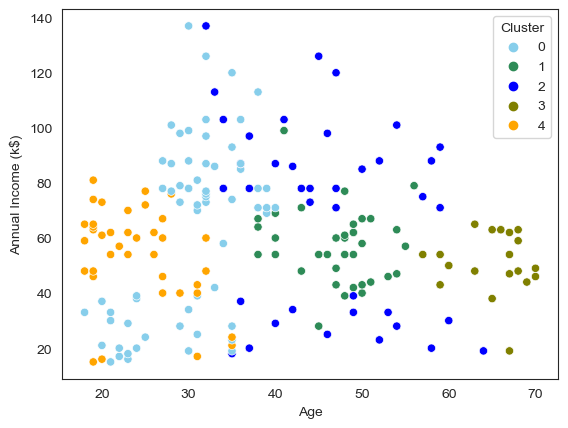

In [228]:
#Age and Annual Income
s7=sns.scatterplot(data=encoded_df, x="Age", y="Annual Income (k$)", hue="Cluster", palette=["skyblue", "seagreen", 
                                                                                  "blue", "olive", "orange"])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend(title="Cluster", loc="best")
plt.show()

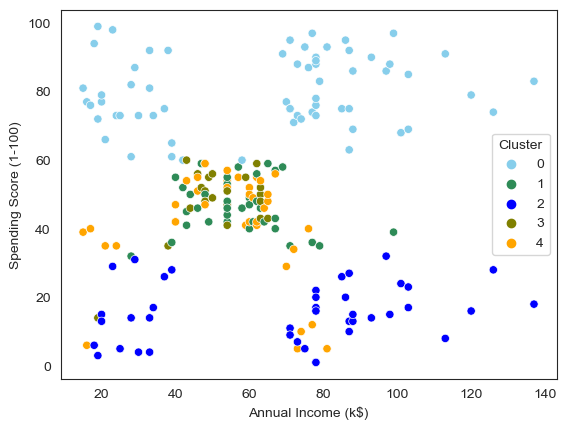

In [229]:
#Annual income and Spending Score (1-100)
s8=sns.scatterplot(data=encoded_df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette=["skyblue", "seagreen", 
                                                                                  "blue", "olive", "orange"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster", loc="best")
plt.show()

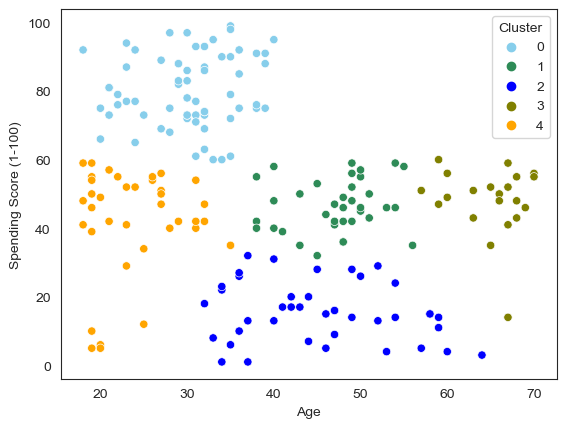

In [230]:
#Age and Spending Score (1-100)
s9=sns.scatterplot(data=encoded_df, x="Age", y="Spending Score (1-100)", hue="Cluster", 
                palette=["skyblue", "seagreen", 
                        "blue", "olive", "orange"])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster", loc="best")
plt.show()

In [231]:
#Calculate silhouette_score for this model

label=kmeans.predict(X_scaled)
print(f'Silhouette Score(n=5): {silhouette_score(X_scaled, label)}')

Silhouette Score(n=5): 0.44754858878462783


<b> KMeans Model with 6 clusters 

In [232]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_scaled)

C:\Users\liman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\liman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [233]:
encoded_df["Cluster"] = kmeans.labels_
print(encoded_df["Cluster"].unique())

[1 5 3 0 2 4]


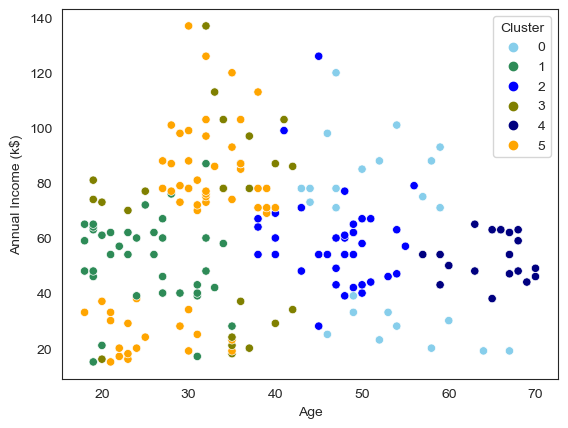

In [234]:
#Age and Annual Income
s10=sns.scatterplot(data=encoded_df, x="Age", y="Annual Income (k$)", hue="Cluster", palette=["skyblue", "seagreen", 
                                                                                  "blue", "olive", "navy", "orange"])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend(title="Cluster", loc="best")
plt.show()

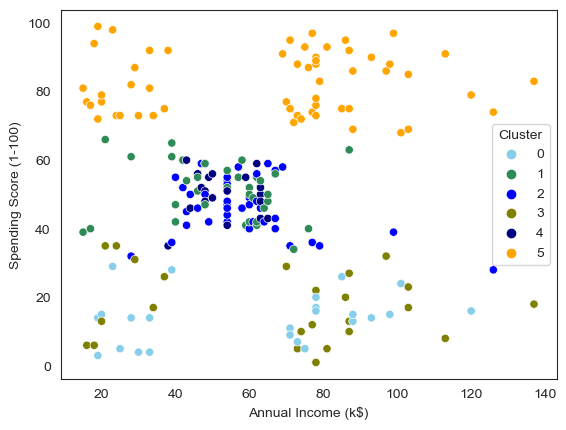

In [235]:
#Age and Spending Score (1-100)
s11=sns.scatterplot(data=encoded_df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster",
                palette=["skyblue", "seagreen", 
                        "blue", "olive", "navy", "orange"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster", loc="best")
plt.show()

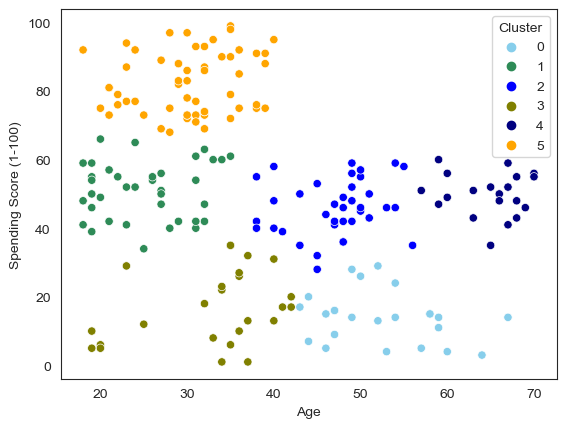

In [236]:
#Age and Spending Score (1-100)
s12=sns.scatterplot(data=encoded_df, x="Age", y="Spending Score (1-100)", hue="Cluster", 
                 palette=["skyblue", "seagreen", 
                        "blue", "olive", "navy", "orange"])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster", loc="best")
plt.show()

<b> We can see that the last model with 6 clusters shows good clusterization depending on Spending Score and Age.

In [237]:
#Calculate silhouette_score for this model

label=kmeans.predict(X_scaled)
print(f'Silhouette Score(n=6): {silhouette_score(X_scaled, label)}')

Silhouette Score(n=6): 0.4531637132837109


In [238]:
#Clusters of certain clients
encoded_df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster,Gender_Male
0,1,19,15,39,1,1
1,2,21,15,81,5,1
2,3,20,16,6,3,0
3,4,23,16,77,5,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,5,0
196,197,45,126,28,2,0
197,198,32,126,74,5,1
198,199,32,137,18,3,1


In [239]:
#Now we can print out the desriptive statistics for each cluster

grouped_df = encoded_df.groupby('Cluster')

# Create a dictionary to store the separate DataFrames for each group
group_dfs = {}

# Iterate over the groups and create a separate DataFrame for each group
for cluster, data in grouped_df:
    group_dfs[cluster] = data

# Apply descriptive statistics to each group
group_stats = {}
for cluster, group_df in group_dfs.items():
    group_stats[cluster] = group_df.describe()

# Print the statistics for each group
for cluster, stats_df in group_stats.items():
    print(f"Cluster {cluster}:")
    print(stats_df)
    print('\n')


Cluster 0:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   24.000000  24.000000           24.000000               24.000000   
mean   104.250000  52.458333           61.083333               14.083333   
std     71.244374   6.626555           31.599280                7.482831   
min      9.000000  43.000000           19.000000                3.000000   
25%     29.500000  47.000000           29.500000                8.500000   
50%    134.000000  52.000000           72.000000               14.000000   
75%    167.500000  58.000000           85.750000               16.250000   
max    195.000000  67.000000          120.000000               29.000000   

       Cluster  Gender_Male  
count     24.0    24.000000  
mean       0.0     0.500000  
std        0.0     0.510754  
min        0.0     0.000000  
25%        0.0     0.000000  
50%        0.0     0.500000  
75%        0.0     1.000000  
max        0.0     1.000000  


Cluster 1:
       CustomerID    

<b> Results. 
<p> <b> As we can see from the descriptive statistics of the groups, clusters are characterized as:
<p> <b> Cluster '0' includes clients with Age 43-67 and Spending Score 3-29 (24 persons totally).
<p> <b> Cluster '1' includes clients with Age 18-35 and Spending Score 34-66 (37 persons totally).
<p> <b> Cluster '2' includes clienst with Age 38-56 and Spending Score 28-59 (37 presons totally).
<p> <b> Cluster '3' includes clients with Age 19-42 and Spending Score 1-35 (25 persons totally).
<p> <b> Cluster '4' includes clients with Age 57-70 and Spending Score 35-60 (20 persons totally).
<p> <b> Cluster '5' includes clients with Age 18-40 and Spending Score 68-99 (57 persons totally).

<b> Cluster '5' with the highest spending score is the largest, cluster '0' with the lower spending score is the smallest.
    <p> We can advice to store managers that the majority of people with the highest spendind score are in the age category 
    18-40. To increase interest of this cluster, assortiments of products popular for this age could be    increased. Also as we have seen before, the majority of buyers are women, so the products for women for this age should prevail. 

<!-- <b> Agglomerative Model -->

<b> Agglomerative Algorithm

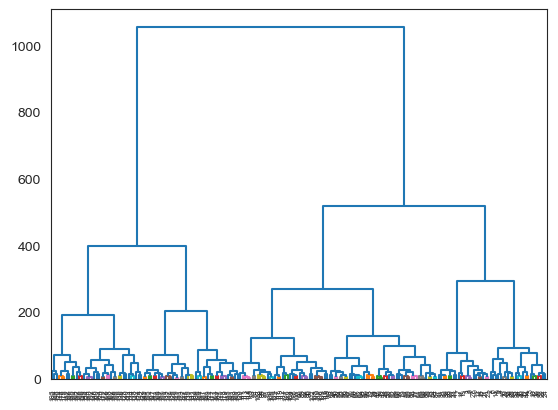

In [240]:
from scipy.cluster.hierarchy import linkage, dendrogram


mergings = linkage(encoded_df,  method='ward')

dendrogram(mergings,
            leaf_rotation=90, color_threshold=10)
plt.show()

In [59]:
linkage

<function scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)>

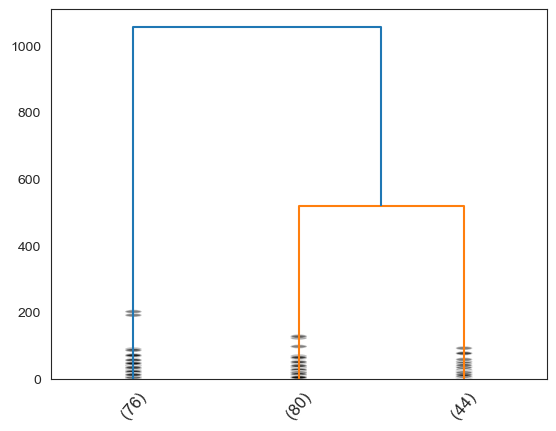

In [241]:
dendrogram(mergings,
           truncate_mode='lastp',   
           p=3,  
           leaf_rotation=50,
           show_contracted=True)

plt.show()

<b> Agglomerative Algorithm with 3 Clusters

In [250]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

hc = AgglomerativeClustering(n_clusters=3)

y_hc = hc.fit_predict(X_scaled)


metrics.silhouette_score(X_scaled, y_hc)


0.41664148520394606

C:\Users\liman\AppData\Local\Temp\ipykernel_14072\3495278569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Labels'] = agglom.labels_


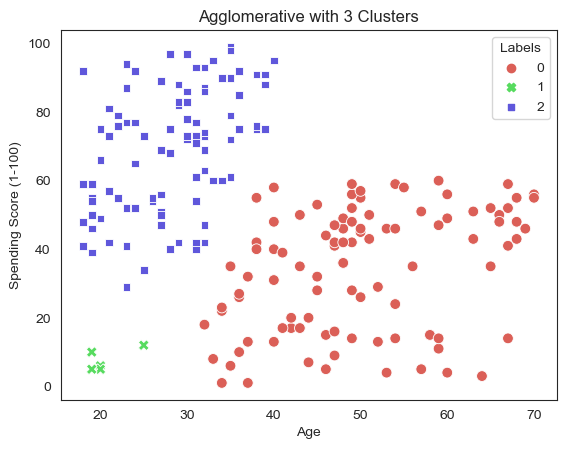

In [251]:
# For visualization I took the features which were the best in previous algorithm
agglom = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X_scaled)
X['Labels'] = agglom.labels_

fig, ax = plt.subplots()
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Labels', style='Labels',
                palette=sns.color_palette('hls', 3), s=60, data=X, ax=ax)
ax.set_title('Agglomerative with 3 Clusters')
plt.show()

<b> Agglomerative Algorithm with 4 Clusters

In [252]:
hc = AgglomerativeClustering(n_clusters=4)


y_hc = hc.fit_predict(X_scaled)


metrics.silhouette_score(X_scaled, y_hc)

0.3892700489345869

C:\Users\liman\AppData\Local\Temp\ipykernel_14072\959586020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Labels'] = agglom.labels_
C:\Users\liman\AppData\Local\Temp\ipykernel_14072\959586020.py:5: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Labels', style='Labels',


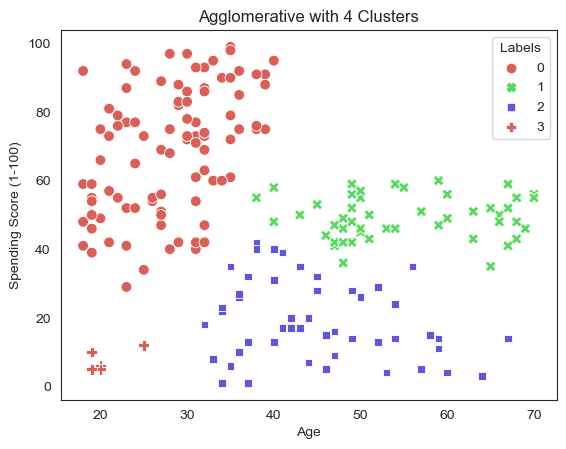

In [253]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='average').fit(X_scaled)
X['Labels'] = agglom.labels_

fig, ax = plt.subplots()
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Labels', style='Labels',
                palette=sns.color_palette('hls', 3), s=60, data=X, ax=ax)
ax.set_title('Agglomerative with 4 Clusters')
plt.show()

<b> Agglomerative Algorithm with 5 Clusters

In [254]:
hc = AgglomerativeClustering(n_clusters=5)

y_hc = hc.fit_predict(X_scaled)


metrics.silhouette_score(X_scaled, y_hc)

0.3764554127950157

C:\Users\liman\AppData\Local\Temp\ipykernel_14072\3738958160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Labels'] = agglom.labels_
C:\Users\liman\AppData\Local\Temp\ipykernel_14072\3738958160.py:5: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Labels', style='Labels',


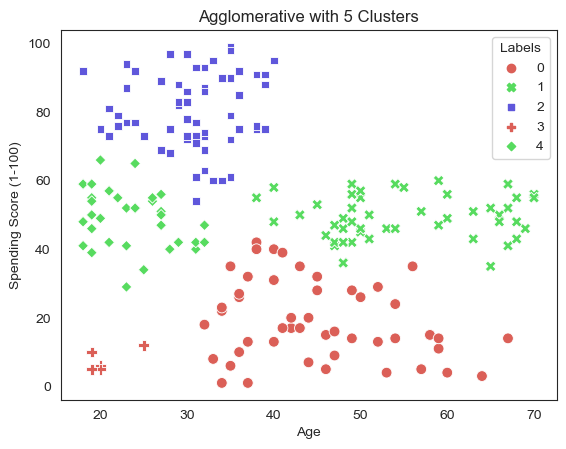

In [255]:
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X_scaled)
X['Labels'] = agglom.labels_

fig, ax = plt.subplots()
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Labels', style='Labels',
                palette=sns.color_palette('hls', 3), s=60, data=X, ax=ax)
ax.set_title('Agglomerative with 5 Clusters')
plt.show()

<b> Agglomerative Algorithm with 6 Clusters

In [256]:
hc = AgglomerativeClustering(n_clusters=5)

y_hc = hc.fit_predict(X_scaled)


metrics.silhouette_score(X_scaled, y_hc)

0.3764554127950157

C:\Users\liman\AppData\Local\Temp\ipykernel_14072\3859328910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Labels'] = agglom.labels_
C:\Users\liman\AppData\Local\Temp\ipykernel_14072\3859328910.py:5: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Labels', style='Labels',


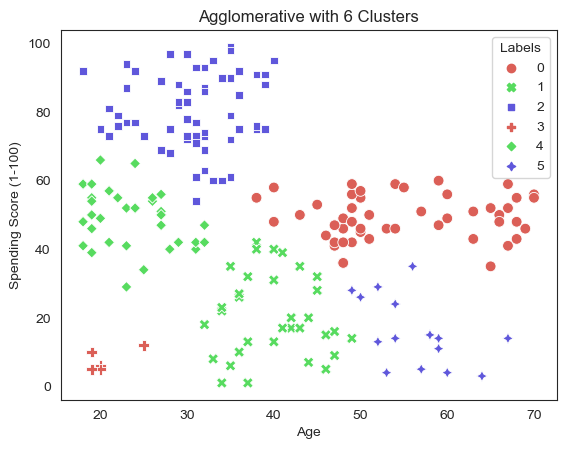

In [258]:
agglom = AgglomerativeClustering(n_clusters=6, linkage='average').fit(X_scaled)
X['Labels'] = agglom.labels_

fig, ax = plt.subplots()
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Labels', style='Labels',
                palette=sns.color_palette('hls', 3), s=60, data=X, ax=ax)
ax.set_title('Agglomerative with 6 Clusters')
plt.show()

<b> Results. 
    <p> Silhouette_score in this method was lower (0.37-0.41 comparing to 0.45 of KMeans). 

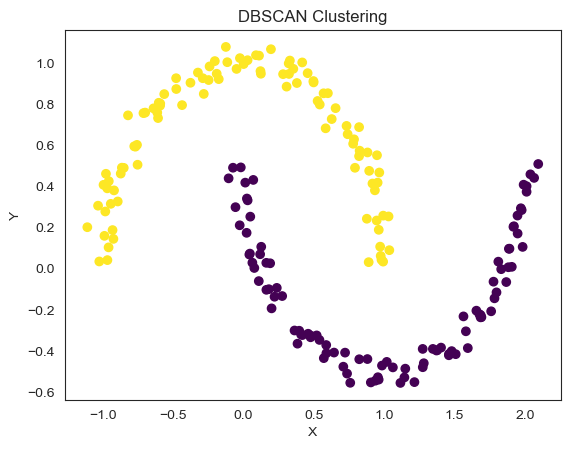

In [267]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_scaled)

# Get the cluster labels assigned by DBSCAN
labels = dbscan.labels_

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering')
plt.show()

In [266]:
#Finding the entities for each cluster
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(encoded_df)

# Create a new column in the DataFrame to store the cluster labels
df['Cluster'] = labels

# Extract entities in Cluster 0
cluster_0_entities = encoded_df[encoded_df['Cluster'] == 0]

# Extract entities in Cluster 1
cluster_1_entities = encoded_df[encoded_df['Cluster'] == 1]

# Print the entities in Cluster 0
print("Entities in Cluster 0:")
print(cluster_0_entities)

# Print the entities in Cluster 1
print("Entities in Cluster 1:")
print(cluster_1_entities)

Entities in Cluster 0:
     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Cluster  \
8             9   64                  19                       3        0   
10           11   67                  19                      14        0   
12           13   58                  20                      15        0   
18           19   52                  23                      29        0   
22           23   46                  25                       5        0   
24           25   54                  28                      14        0   
30           31   60                  30                       4        0   
32           33   53                  33                       4        0   
34           35   49                  33                      14        0   
44           45   49                  39                      28        0   
128         129   59                  71                      11        0   
130         131   47                  71             

In [269]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(encoded_df, labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.00478166795859379


<b> Result. We can see from the score and visualization, that DBSCAN is not proper decision for this type of data